In [0]:
# Import the machine learning libraries.
import pandas as pd
import numpy as np
import re
import pickle 
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import load_files
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [6]:
# Download the stopwords.
%%time
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
CPU times: user 1.73 ms, sys: 0 ns, total: 1.73 ms
Wall time: 2.7 ms


True

In [7]:
# Import the sentiment polarity datasets.
# Download polarity dataset v2.0. (review_polarity.tar.gz) 
# on http://www.cs.cornell.edu/people/pabo/movie-review-data/.
# This dataset contains 1000 positive and 1000 negative reviews, respectively.
%%time
reviews = load_files('./drive/My Drive/ML_Code/Polarity Classification/txt_sentoken/')
X,y = reviews.data,reviews.target

CPU times: user 519 ms, sys: 426 ms, total: 944 ms
Wall time: 27min 52s


In [8]:
# Create the corpus
%%time
corpus = []
for i in range(0, 2000):
    review = re.sub(r'\W', ' ', str(X[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+br\s+',' ',review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^b\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review)

CPU times: user 1.49 s, sys: 18.4 ms, total: 1.51 s
Wall time: 1.51 s


In [9]:
# Convert a collection of text documents to a matrix of token counts.
%%time
vectorizer = CountVectorizer(max_features = 2000, min_df = 3, max_df = 0.6, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(corpus).toarray()

CPU times: user 903 ms, sys: 22.3 ms, total: 925 ms
Wall time: 941 ms


In [10]:
# Convert a collection of raw documents to a matrix of TF-IDF features
%%time
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 3, max_df = 0.6, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(corpus).toarray()

CPU times: user 911 ms, sys: 9.2 ms, total: 920 ms
Wall time: 932 ms


In [11]:
# Split the dataset into the training set and test subsets.
%%time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

CPU times: user 11.6 ms, sys: 876 µs, total: 12.4 ms
Wall time: 12.9 ms


In [12]:
# Train the Logistic Regression classifier.
%%time
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

CPU times: user 121 ms, sys: 17.7 ms, total: 139 ms
Wall time: 79.5 ms


In [13]:
# Evaluate estimator performance.
%%time
score = clf.score(X_test, y_test)
print('Accuracy: %.2f' % (score))

Accuracy: 0.85
CPU times: user 1.4 ms, sys: 6.48 ms, total: 7.88 ms
Wall time: 7.2 ms


In [14]:
# Compute cross-validated metrics (10-fold).
%%time
scores = cross_val_score(clf, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.86 (+/- 0.05)
CPU times: user 969 ms, sys: 292 ms, total: 1.26 s
Wall time: 665 ms


In [15]:
# Test model performance
%%time
y_pred = clf.predict(X_test)

CPU times: user 556 µs, sys: 10.5 ms, total: 11.1 ms
Wall time: 11.5 ms


In [16]:
# Print Confusion Matrix.
%%time
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[168  40]
 [ 21 171]]
CPU times: user 3.34 ms, sys: 2 ms, total: 5.34 ms
Wall time: 4.57 ms


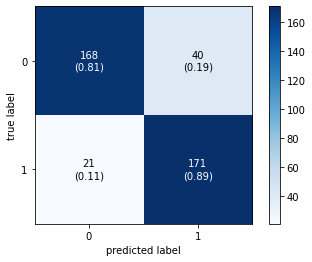

CPU times: user 195 ms, sys: 1.66 ms, total: 197 ms
Wall time: 197 ms


In [22]:
# Plot the confusion matrix.
%%time
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

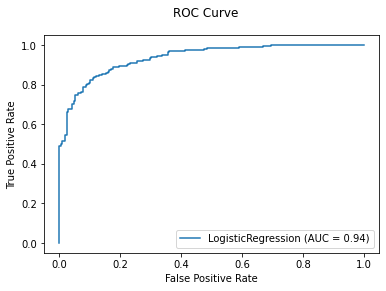

In [18]:
# Plot the ROC curve.
clf_disp = plot_roc_curve(clf, X_test, y_test)
clf_disp.figure_.suptitle("ROC Curve")

plt.show()